## Zaimportowane biblioteki

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import time

## Zadanie 1

Trajektorie szumu telegraficznego.

Text(0, 0.5, '$X_{t}$')

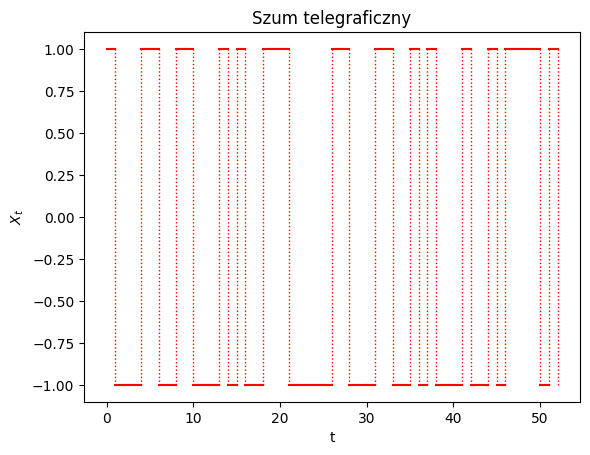

In [90]:
def process(T, lam = 1):                           #Funkcja generująca czasy oczekiwania procesu Poissona
    results = np.array([])
    t = 0
    i = 0
    vals = np.array([])
    while t <= T:
        vals = np.append(vals, i)
        u = np.random.uniform()
        t = t - np.log(u)/lam
        results = np.append(results, t)
        i += 1
    return results, vals


def telegraph_noise(T):                         #Funkcja generująca trajektorie procesu szumu telegraficznego
    sample, val = process(T)
    D = np.random.choice([1, -1], size = len(sample), p = [0.5, 0.5])
    xt = D*(-1)**val
    return xt, val

xt, val = telegraph_noise(50)                           #plotowanie trajektorii
xs = [i for i in range(len(val)+1)]
for i in range(len(xt)-1):
    x = np.linspace(xs[i], xs[i+1], 10)
    y = np.linspace(xt[i], xt[i], 10)
    plt.plot(x,y, color = 'red')
    if xt[i]>xt[i+1]:
        plt.vlines(x=xs[i+1], ymin=xt[i+1], ymax=xt[i],colors='red', linestyles='dotted', linewidth=1)
    if xt[i+1]>xt[i]:
        plt.vlines(x=xs[i+1], ymin=xt[i], ymax=xt[i+1],colors='red', linestyles='dotted', linewidth=1)
plt.title('Szum telegraficzny')
plt.xlabel('t')
plt.ylabel(r'$X_{t}$')        

Wartość oczekiwana procesu

Text(0.5, 1.0, 'Wartość średnią procesu')

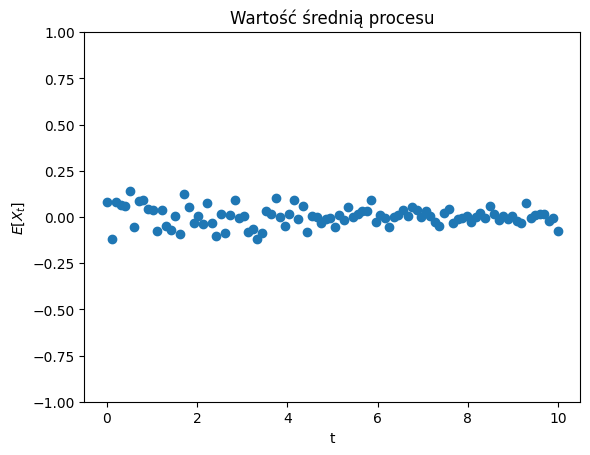

In [91]:
def expected_value(N):          #funkcja licząca wartość średnią procesu
    results = []
    times = np.linspace(0,10,N)
    for time in times:
        temp = []
        for i in range(100):
            xt, val = telegraph_noise(time)
            temp = np.append(temp, np.mean(xt))
        results.append(np.sum(temp)/N)
    return results

sample = expected_value(100)
x_axis = np.linspace(0, 10, 100)
plt.scatter(x_axis, sample)
plt.ylim(-1,1)
plt.xlabel('t')
plt.ylabel(r'$E[X_t]$')
plt.title('Wartość średnią procesu')

Kowariancja($X_0, X_t$)

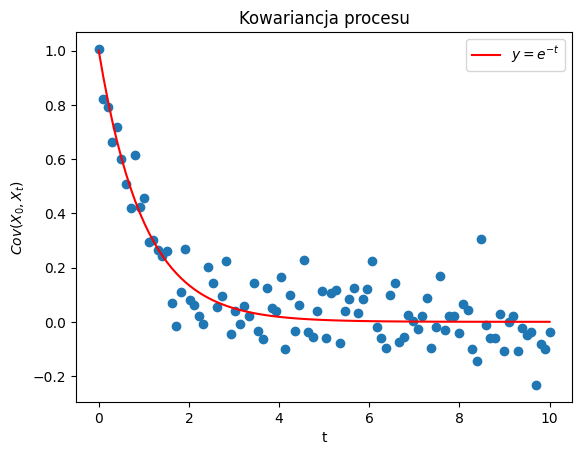

In [92]:
def covariance(N):              #funkcja licząca kowariancję
    results = np.zeros(N)
    times = np.linspace(0,10,N)
    for time in times:
        xs_0 = np.zeros(100)
        xs_t = np.zeros(100)
        for i in range(100):
            xt, val = telegraph_noise(time)
            xs_0[i] = xt[0]
            xs_t[i] = xt[-1]
        results[list(times).index(time)] = np.cov(xs_0, xs_t)[0][1]
    return results
sample = covariance(100)
x_axis = np.linspace(0, 10, 100)
plt.scatter(x_axis, sample)
plt.plot(x_axis, np.exp(-x_axis), label = r'$y=e^{-t}$', c='r')
plt.xlabel('t')
plt.ylabel(r'$Cov(X_0, X_t)$')
plt.title('Kowariancja procesu')
plt.legend()


Jak możemy zauwazyć na powyższym wykresie $r_t$ zanika w tempie wykładniczym.

## Zadanie 2

Trajektorie niejednorodnych procesów Poissona

In [43]:
def lam_func1(t, lam = 2):     #funkcja wolnorosnąca
    return lam *t

def lam_func2(t, lam = 4):      #funkcja szybkorosnąca
    return lam*t**3

def nhpp_thinning(T, func):        #metoda przerzedzania
    results = []
    t = 0
    acceptance = 0
    runs = 0
    lmax = func(T)
    while t <= T:
        t += np.random.exponential(scale=1/lmax)
        u = np.random.uniform()
        runs += 1
        while lmax * u >= func(t):
            t += np.random.exponential(scale=1/lmax)
            u = np.random.uniform()
            runs += 1
        acceptance += 1
        results.append(t)
    return results, acceptance/runs

Procent zaakceptowanych puntków 0.4951923076923077 dla funkcji wolnorosnącej
Procent zaakceptowanych puntków 0.2516051061258403 dla funkcji szybkorosnącej


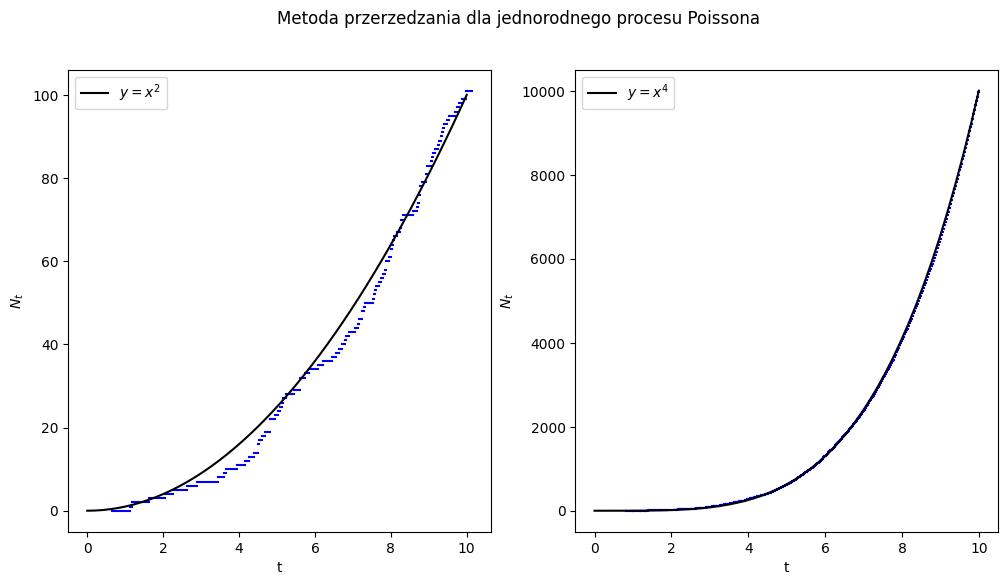

In [50]:
fig, axes = plt.subplots(1, 2, figsize = (12, 6))
start = time.perf_counter()
results, rate = nhpp_thinning(10, lam_func1)
end = time.perf_counter()
time_thinning_slow = end-start
x_axis = np.linspace(0,10)
ys = [i for i in range(0, len(results)-1)]
for i in range(0, len(results)-1):
    x = np.linspace(results[i], results[i+1], 10)
    y = np.linspace(ys[i], ys[i], 10)
    axes[0].plot(x, y, c='blue')
axes[0].plot(x_axis, x_axis**2, c='black', label = r'$y = x^2$')
axes[0].set_xlabel('t')
axes[0].set_ylabel(r'$N_t$')
axes[0].legend()
print(f'Procent zaakceptowanych puntków {rate} dla funkcji wolnorosnącej')
start = time.perf_counter()
results, rate = nhpp_thinning(10, lam_func2)
end = time.perf_counter()
time_thinning_fast = end-start
x_axis = np.linspace(0,10)
ys = [i for i in range(0, len(results)-1)]
for i in range(0, len(results)-1):
    x = np.linspace(results[i], results[i+1], 10)
    y = np.linspace(ys[i], ys[i], 10)
    axes[1].plot(x, y, c='blue')
axes[1].plot(x_axis, x_axis**4, c='black', label = r'$y = x^4$')
axes[1].set_xlabel('t')
axes[1].set_ylabel(r'$N_t$')
axes[1].legend()
fig.suptitle('Metoda przerzedzania dla jednorodnego procesu Poissona')
print(f'Procent zaakceptowanych puntków {rate} dla funkcji szybkorosnącej')


Text(0.5, 0.98, 'Metoda odwrotnej dystrybuanty dla niejednorodnego procesu Poissona')

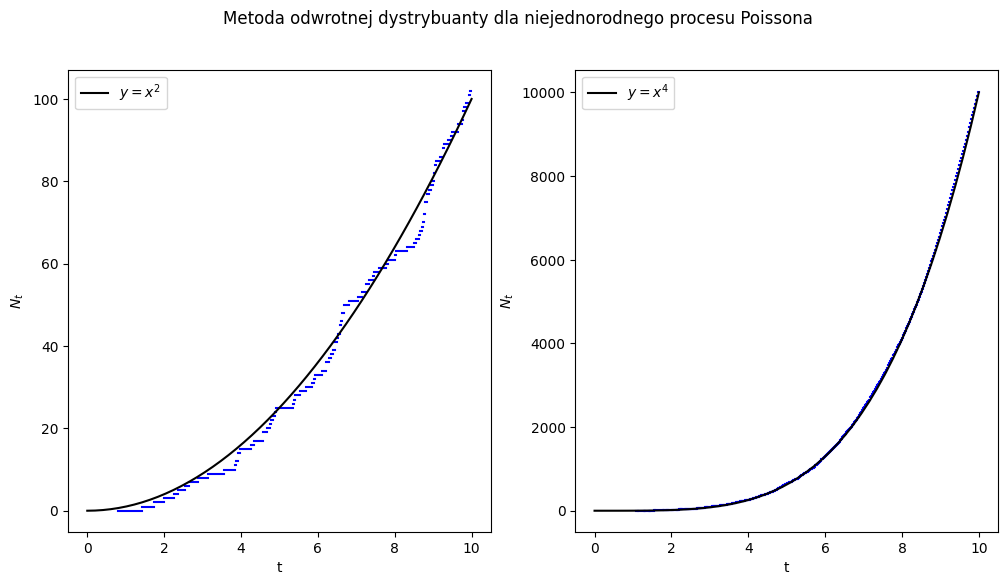

In [51]:
def mt1(lam, t):
    return lam*t**2/2

def inv_mt1(lam, t, T):       #odwrotna dystrybuanta dla funkcji wolnorosnącej
    return np.sqrt(2*t*mt1(lam,T)/lam)

def mt2(lam, t):
    return lam*t**4/4

def inv_mt2(lam, t, T):         #odwrotna dystrybuanta dla funkcji szybkorosnącej
    return (4*t*mt2(lam,T)/lam)**(1/4)

def nhpp_inv_dist(T, lam, func, inv_fun):       #metoda odwrotnej dystrybuanty
    nt = np.random.poisson(func(lam, T))
    u = np.random.uniform(size=nt)
    results = inv_fun(lam, u, 10)
    return sorted(results)


fig, axes = plt.subplots(1, 2, figsize = (12, 6))    
start = time.perf_counter()
results = nhpp_inv_dist(10, 2, mt1, inv_mt1)
end = time.perf_counter()
time_inv_slow = end-start
x_axis = np.linspace(0,10)
ys = [i for i in range(0, len(results)-1)]
for i in range(0, len(results)-1):
    x = np.linspace(results[i], results[i+1], 10)
    y = np.linspace(ys[i], ys[i], 10)
    axes[0].plot(x, y, c='blue')
axes[0].plot(x_axis, x_axis**2, c='black', label=r'$y=x^2$')
axes[0].set_xlabel('t')
axes[0].set_ylabel(r'$N_t$')
axes[0].legend()
start = time.perf_counter()
results = nhpp_inv_dist(10, 4, mt2, inv_mt2)
end = time.perf_counter()
time_inv_fast = end-start
x_axis = np.linspace(0,10)
ys = [i for i in range(0, len(results)-1)]
for i in range(0, len(results)-1):
    x = np.linspace(results[i], results[i+1], 10)
    y = np.linspace(ys[i], ys[i], 10)
    axes[1].plot(x, y, c='blue')
axes[1].plot(x_axis, x_axis**4, c='black', label=r'$y=x^4$')
axes[1].set_xlabel('t')
axes[1].set_ylabel(r'$N_t$')
axes[1].legend()
fig.suptitle('Metoda odwrotnej dystrybuanty dla niejednorodnego procesu Poissona')

Szybkość generacji niejednorodengo procesu Poissona dla obu metod

In [56]:
print(f'Czas generowania niejednorodnego procesu Poissona metodą przerzedzania dla funkcji wolnorosnącej {time_thinning_slow:.6f}')
print(f'Czas generowania niejednorodnego procesu Poissona metodą przerzedzania dla funkcji szybkorosnącej {time_thinning_fast:.6f}')
print(f'Czas generowania niejednorodnego procesu Poissona metodą odwrotnej dystrybuanty dla funkcji wolnorosnącej {time_inv_slow:.6f}')
print(f'Czas generowania niejednorodnego procesu Poissona metodą odwrotnej dystrybuanty dla funkcji szybkorosnącej {time_inv_fast:.6f}')

Czas generowania niejednorodnego procesu Poissona metodą przerzedzania dla funkcji wolnorosnącej 0.002557
Czas generowania niejednorodnego procesu Poissona metodą przerzedzania dla funkcji szybkorosnącej 0.327247
Czas generowania niejednorodnego procesu Poissona metodą odwrotnej dystrybuanty dla funkcji wolnorosnącej 0.000640
Czas generowania niejednorodnego procesu Poissona metodą odwrotnej dystrybuanty dla funkcji szybkorosnącej 0.011072


Jak widać metoda odwrotnej dystrybuanty działa szybciej niż metoda przerzedzania gdy generujemy niejednorodny proces Poissona.

## Zadanie 3

Estymacja niejednorodnej funkcji intensywności losowej miary Poissonowskiej w 1D

(array([ 144.,  314.,  505.,  693.,  900., 1116., 1278., 1540., 1671.,
        1780.]),
 array([0.13435383, 1.12075465, 2.10715547, 3.09355629, 4.07995711,
        5.06635793, 6.05275875, 7.03915957, 8.0255604 , 9.01196122,
        9.99836204]),
 <BarContainer object of 10 artists>)

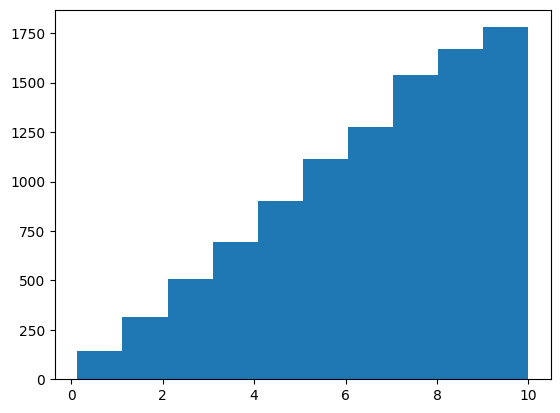

In [67]:
def lamb_func(lamb, x):  
    return lamb*2*x
def poisson_1D(lamb=1000):   #funkcja estymująca funkcję intensywności losowej miary Poissonowskiej w 1D
    lamb_max = lamb*20
    nt = np.random.poisson(lamb_max)
    xs = np.random.uniform(0, 10, size=nt)
    thinning = [np.random.uniform()*lamb_max <= lamb_func(lamb, x) for x in xs]
    x_axis = xs[thinning]
    return x_axis
    
vals = poisson_1D()
x_axis = np.linspace(0,10, 100)
plt.hist(vals, label = 'ilość punktów w danej komórce')


Estymacja niejednorodnej funkcji intensywności losowej miary Poissonowskiej w 2D

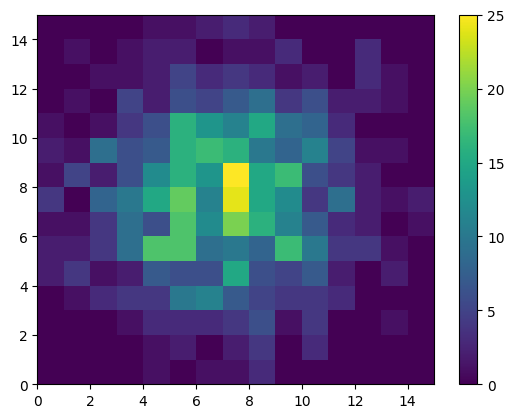

In [57]:
r=2
def lamb_func(lamb, x):
    return lamb*np.exp(-1*np.abs(x)**2)

def poisson_2D(lamb=300):       #funkcja estymująca funkcję intensywności losowej miary Poissonowskiej w 1D
    lamb_max = lamb
    n_t = np.random.poisson(lamb_max*np.pi*r**2)
    xs = np.empty(n_t)
    ys = np.empty(n_t)
    distances = np.empty(n_t)
    for i in range(n_t):
        x = np.random.uniform(low = -r, high = r)
        y = np.random.uniform(low = -r, high = r)
        while x**2 + y**2 > r**2:
            x = np.random.uniform(low = -r, high = r)
            y = np.random.uniform(low = -r, high = r)
        xs[i] = x
        ys[i] = y
        distances[i] = np.sqrt(x**2+y**2)
        
    thinning = [np.random.uniform()*lamb_max <= lamb_func(lamb, dist) for dist in distances]
    x_axis = xs[thinning]
    y_axis = ys[thinning]
    return x_axis, y_axis

xs, ys = poisson_2D()
hist, xedges, yedges = np.histogram2d(xs, ys, bins=(15, 15))
plt.pcolormesh(hist)
plt.colorbar()

## Zadanie 4

Prawdopodobieństwo ruiny

Text(0.5, 1.0, 'Prawdopodobieństwo ruiny w zależności od czasu')

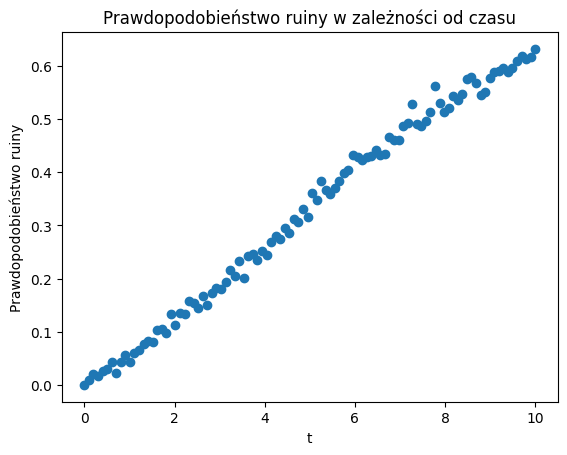

In [68]:
def process(T=10):
    results = np.array([0])             #funkcja generująca czasy oczekiwania procesu Poissona
    lam = 1
    t = 0
    while t <= T:
        u = np.random.uniform(0,1)
        t = t - np.log(u)/lam
        results = np.append(results, t)
    return results

intervals = process()
def risk_process(T, intervals, u=5, c=0.5, lam=1):
    times = np.linspace(0, T, 1000)                     #funkcja generująca trajektorie procesu ryzyka
    damages = np.random.exponential(scale = lam, size = len(intervals))
    idxs = []
    for time in intervals:
        for t in times:
            if time<t:
                idxs.append(list(times).index(t))
                break
    income = c*times
    damage_idx = list(zip(damages, idxs))
    for damage, idx in damage_idx:
        income[idx:] -= damage
    values = u + income
    return times, values

def risk(T, u=5, c=0.5, lam=1):  #funkcja szacująca prawdopodobieństwo ruiny
    result = 0
    for i in range(1000):
        intervals = process()
        times, values = risk_process(T, intervals)
        if np.any(values<0):
            result += 1
    return result/1000

bankrupcy = []
for t in np.linspace(0,10 ,100):
    bankrupcy.append(risk(t))
plt.scatter(np.linspace(0,10,100), bankrupcy)
plt.xlabel('t')
plt.ylabel('Prawdopodobieństwo ruiny')
plt.title('Prawdopodobieństwo ruiny w zależności od czasu')

Trajektorie procesu ryzyka

Text(0.5, 0.98, 'Trajektorie procesu ryzyka')

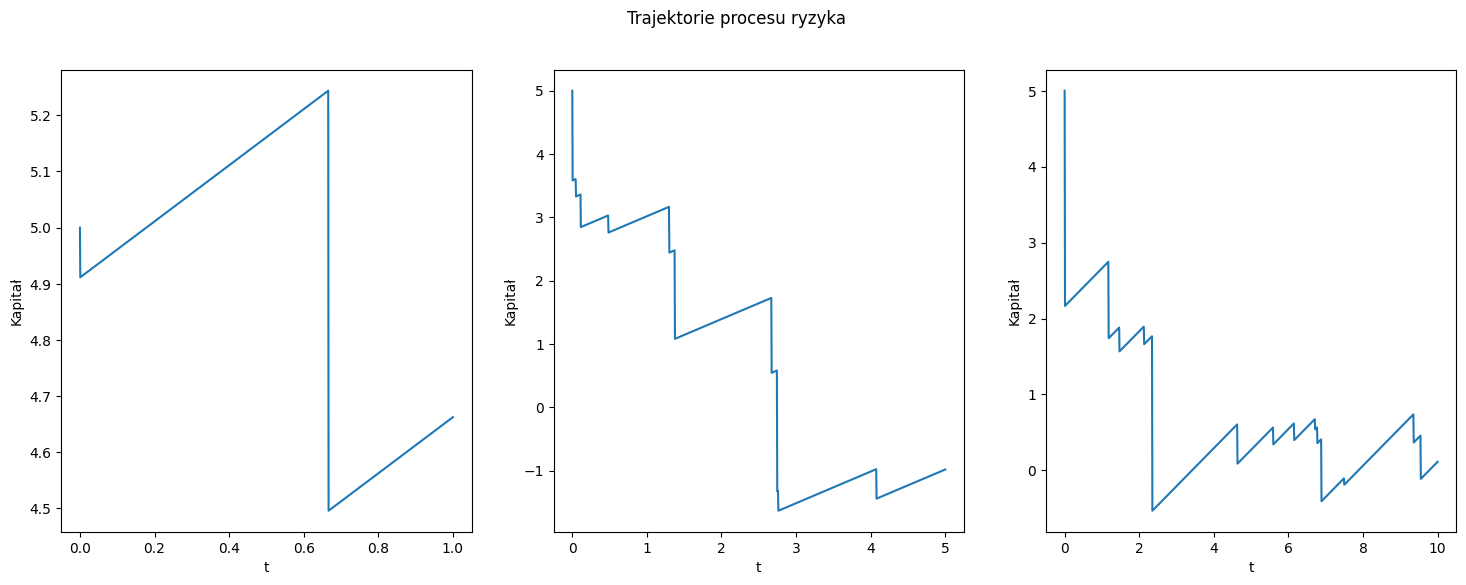

In [72]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))
time_1, vals_1 = risk_process(1, process(1))
time_5, vals_5 = risk_process(5, process(5))
time_10, vals_10 = risk_process(10, process(10))
axes[0].plot(time_1, vals_1)
axes[0].set_xlabel('t')
axes[0].set_ylabel('Kapitał')
axes[1].plot(time_5, vals_5)
axes[1].set_xlabel('t')
axes[1].set_ylabel('Kapitał')
axes[2].plot(time_10, vals_10)
axes[2].set_xlabel('t')
axes[2].set_ylabel('Kapitał')
fig.suptitle('Trajektorie procesu ryzyka')

Prawdopodobieństwo ruiny jest coraz większe wraz ze wzrostem czasu.

## Zadanie 5

In [77]:
def markov(states, N, x0):    #funkcja generująca trajektorię łańcuchu Markowa
    idxs = np.empty(N, dtype=int)
    p_matrix = np.array([[0.5, 0.5, 0],[0, 0.5, 0.5],[0.5, 0, 0.5]])
    for i in range(N):
        idxs[i] = x0
        x0 = np.random.choice([0,1,2], p = p_matrix[x0])

    xs = states[idxs]
    values, counts = np.unique(xs, return_counts=True)
    return counts


Text(0.5, 0.98, 'Średni czas przyjmowania danego stanu przez trajektorię dla t = 100')

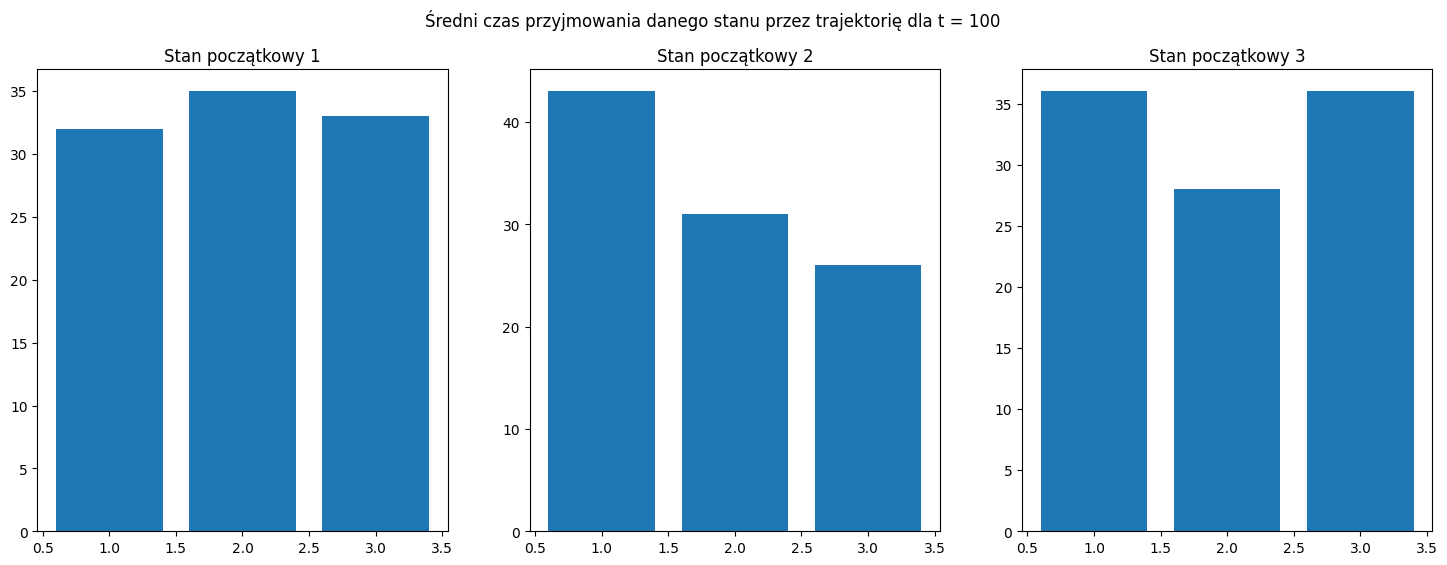

In [78]:
states = np.array([1,2,3])
N=100
fig, axes = plt.subplots(1, 3, figsize = (18, 6))
counts = markov(states, N, 0)
axes[0].bar(states, counts)
axes[0].set_title('Stan początkowy 1')
counts = markov(states, N, 1)
axes[1].bar(states, counts)
axes[1].set_title('Stan początkowy 2')
counts = markov(states, N, 2)
axes[2].bar(states, counts)
axes[2].set_title('Stan początkowy 3')
fig.suptitle('Średni czas przyjmowania danego stanu przez trajektorię dla t = 100')

Text(0.5, 0.98, 'Średni czas przyjmowania danego stanu przez trajektorię dla t = 1000')

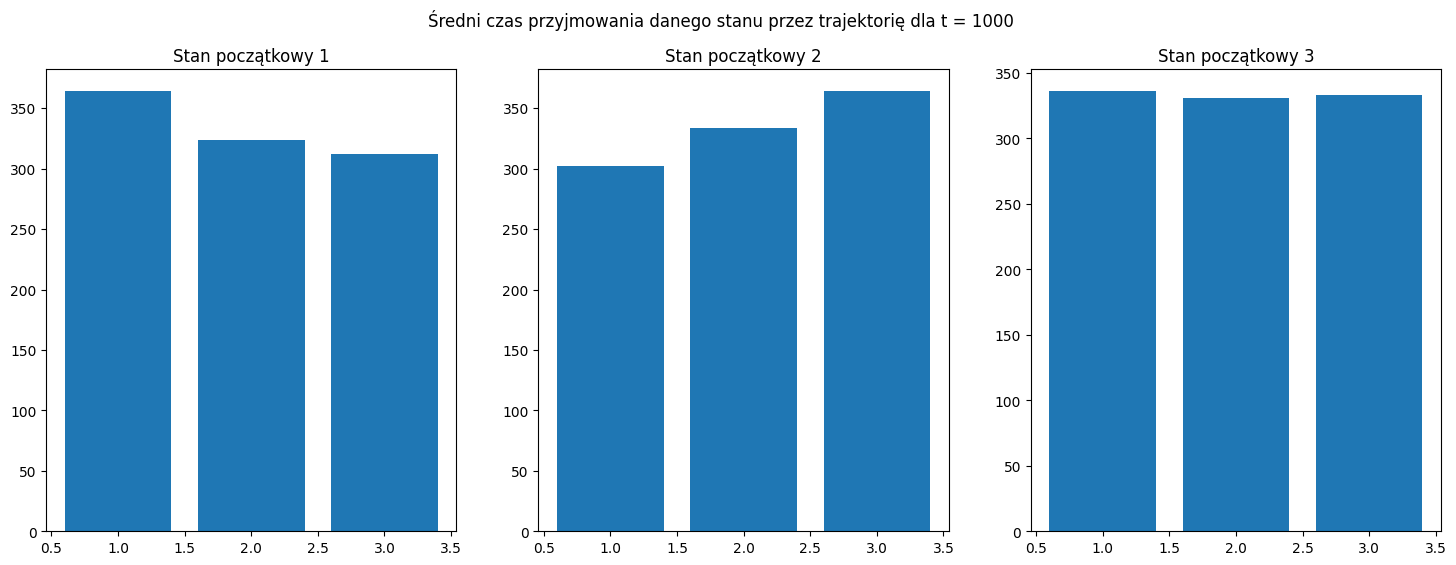

In [79]:
states = np.array([1,2,3])
N=1000
fig, axes = plt.subplots(1, 3, figsize = (18, 6))
counts = markov(states, N, 0)
axes[0].bar(states, counts)
axes[0].set_title('Stan początkowy 1')
counts = markov(states, N, 1)
axes[1].bar(states, counts)
axes[1].set_title('Stan początkowy 2')
counts = markov(states, N, 2)
axes[2].bar(states, counts)
axes[2].set_title('Stan początkowy 3')
fig.suptitle('Średni czas przyjmowania danego stanu przez trajektorię dla t = 1000')

Text(0.5, 0.98, 'Średni czas przyjmowania danego stanu przez trajektorię dla t = 5000')

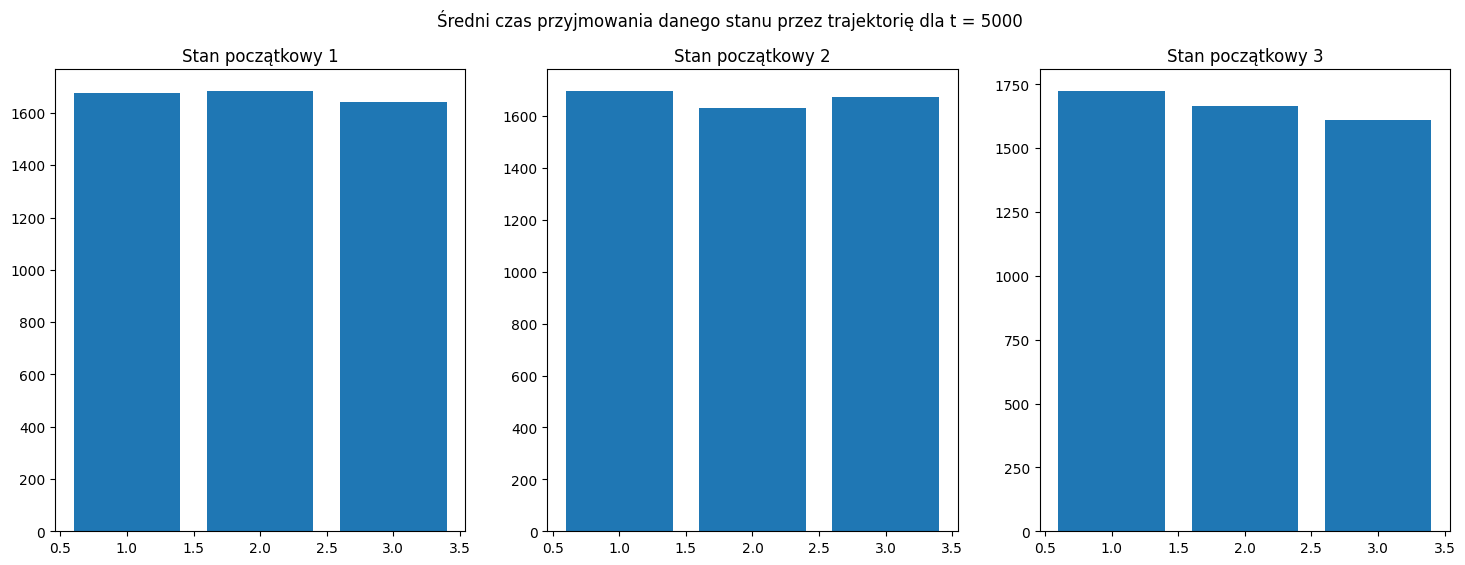

In [81]:
states = np.array([1,2,3])
N=5000
fig, axes = plt.subplots(1, 3, figsize = (18, 6))
counts = markov(states, N, 0)
axes[0].bar(states, counts)
axes[0].set_title('Stan początkowy 1')
counts = markov(states, N, 1)
axes[1].bar(states, counts)
axes[1].set_title('Stan początkowy 2')
counts = markov(states, N, 2)
axes[2].bar(states, counts)
axes[2].set_title('Stan początkowy 3')
fig.suptitle('Średni czas przyjmowania danego stanu przez trajektorię dla t = 5000')

Text(0.5, 0.98, 'Średni czas przyjmowania danego stanu przez trajektorię dla t = 7000')

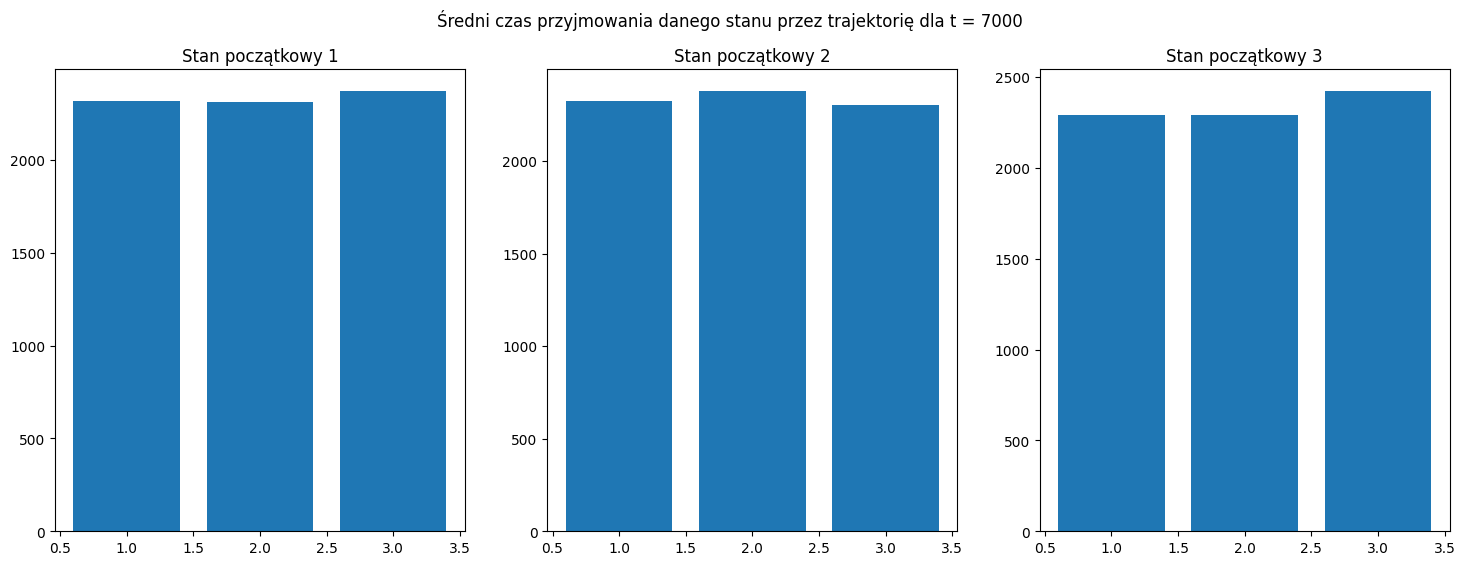

In [82]:
states = np.array([1,2,3])
N=7000
fig, axes = plt.subplots(1, 3, figsize = (18, 6))
counts = markov(states, N, 0)
axes[0].bar(states, counts)
axes[0].set_title('Stan początkowy 1')
counts = markov(states, N, 1)
axes[1].bar(states, counts)
axes[1].set_title('Stan początkowy 2')
counts = markov(states, N, 2)
axes[2].bar(states, counts)
axes[2].set_title('Stan początkowy 3')
fig.suptitle('Średni czas przyjmowania danego stanu przez trajektorię dla t = 7000')

Text(0.5, 0.98, 'Średni czas przyjmowania danego stanu przez trajektorię dla t = 10000')

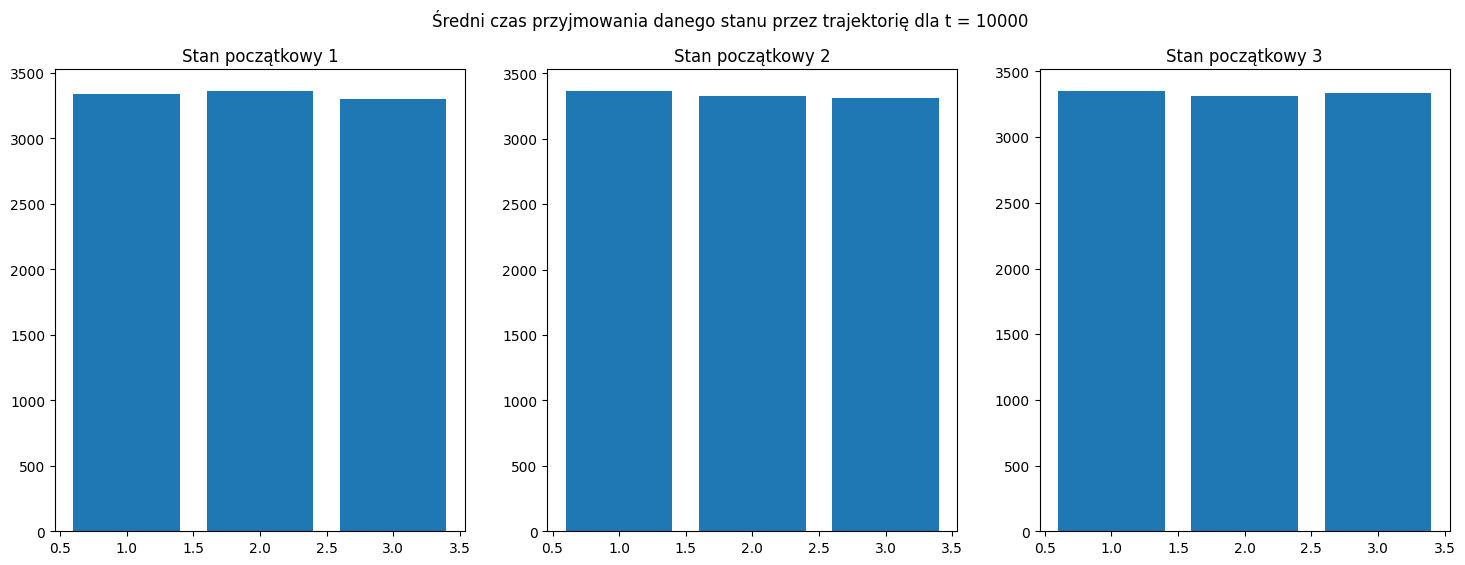

In [80]:
states = np.array([1,2,3])
N=10000
fig, axes = plt.subplots(1, 3, figsize = (18, 6))
counts = markov(states, N, 0)
axes[0].bar(states, counts)
axes[0].set_title('Stan początkowy 1')
counts = markov(states, N, 1)
axes[1].bar(states, counts)
axes[1].set_title('Stan początkowy 2')
counts = markov(states, N, 2)
axes[2].bar(states, counts)
axes[2].set_title('Stan początkowy 3')
fig.suptitle('Średni czas przyjmowania danego stanu przez trajektorię dla t = 10000')

Średni czas przyjmowania danego stanu przez każdy stan jest zbliżony bez względu na stan początkowy. Dla ponad 5000 kroków Monte Carlo zbieżność widać wyraźnie.

## Zadanie 6

In [84]:
def brownian(n, t):             #funkcja generująca trajektorię ruchu Browna
    x0 = 0
    times = np.linspace(0, t, n)
    dt = np.diff(times)
    results = np.array([x0])
    for t in dt:
        x0 += np.random.normal(scale=np.sqrt(t))
        results = np.append(results, x0)
    return results

idxs = []
for i in range(1000):
    xs = brownian(1000, 100)
    ys = brownian(1000, 100)
    vals = list(zip(xs,ys))
    for x,y in vals:
        if x**2+y**2>1:
            idxs.append(list(xs).index(x))
            break

Text(0.5, 1.0, 'Rozkład czasu wyjścia ruchu Browna 2D z koła jednostkowego')

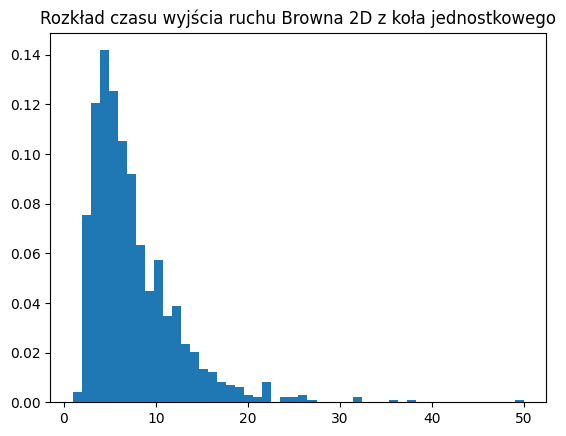

In [88]:
plt.hist(idxs, density=True, bins = 50)
plt.title('Rozkład czasu wyjścia ruchu Browna 2D z koła jednostkowego')